##### Symposium "Recent Advances in Deep Learning Systems", Reisensburg/UUlm, 05.11.2019 - 07.11.2019
##### Heinke Hihn, Institute for Neural Information Processing, UUlm

# Meta-Learning
Meta-learning algorithms can be divided roughly into Metric-Learning (e.g. Koch et al., 2015, Vinyals et al., 2016), Optimizer Learning (e.g. Ravi & LaRochelle, 2017, Finn et al., 2017), and Task Decomposition Models (e.g. Lan et al.,2019, Hihn & Braun, 2019). We will focus on Model Agnostic Meta Learning for Fast Adaptition of Deep Neural Networks (Finn et al., 2017). 
First, we'll give a broad overview on Meta-Learning. 

## Meta Supervised Learning
In a supervised learning task we are usually interested in a dataset consisting of multiple input and output pairs $\mathcal{D} = \{(x_i, y_i)\}^N_{i=0}$ and the learner is tasked with finding a function $f(x)$ that maps from input to output, for example through a deep neural network. To do this, we split the dataset into training and test sets and fit a set of parameters $\theta$ on the training data and evaluate on test data using the learned function $f_\theta(x)$. In meta-learning, we are instead working with meta-datasets $D \in \mathcal{D}$, each containing regular datasets split into training and test sets. We thus have different meta-sets for meta-training,  meta-validation,  and meta-test ($D_\text{{meta-train}}, D_\text{{meta-val}}$, and $D_\text{{meta-test}}$, respectively). On $D_\text{{meta-train}}$, we are interested in training a learning procedure (the meta-learner) that can take as input one of its training sets $D_\text{{train}}$ and produce a classifier (the learner) that achieves low prediction error on its corresponding test set $D_\text{{test}}$. 

A special case of meta-learning for classification are $K$-Shot $N$-way tasks. In this setting, we are given for each dataset $D$ a training set consisting of $K$ labeled examples of each of the $N$ classes ($K\cdot N$ examples per dataset) and corresponding test sets.

## Meta Reinforcement Learning
First, we give a short introduction to reinforcement learning in general and then we show how this definition can be extended to meta reinforcement learning problems. 

We model sequential decision problems by defining a Markov Decision Process as a tuple $(\mathcal{S}, \mathcal{A}, P, r)$, where $\mathcal{S}$ is the set of states, $\mathcal{A}$ the set of actions, $P: \mathcal{S} \times \mathcal{A} \times \mathcal{S} \rightarrow [0,1]$ is the transition probability, and $r: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$ is a reward function. The aim is to find the parameter $\theta$ of a policy $\pi_\theta$ that maximizes the expected reward:

\begin{equation}
\theta^* = \text{arg}\max_{\theta} \underbrace{\mathbb{E}_{\pi_\theta}\left[\sum_{t=0}^\infty r(s_t, a_t)\right]}_{J(\pi_\theta)}.
\end{equation}
We define $r(\tau) = \sum_{t=0}^\infty r(s_t, a_t)$ as the cumulative reward of trajectory $\tau = \{(s_t, a_t)\}_{i=0}^\infty$,  which is sampled by acting according to the policy $\pi$, i.e. $(s, a)\sim \pi(\cdot|s),$ and $s_{t+1} \sim P(\cdot|s_t, a_t)$.
Learning in this environment can then be modeled by reinforcement learning (Sutton & Barto, 2018), where an agent interacts with an environment over a number of (discrete) time steps $t$. At each time step $t$, the agent finds itself in a state $s_t$ and selects an action $a_t$ according to the policy $\pi(a_t|s_t)$. In return, the environment transitions to the next state $s_{t+1}$ and generates a scalar reward $r_t$. This process continues until the agent reaches a terminal state after which the process restarts. The goal of the agent is to maximize the expected return from each state $s_t$, which is typically defined as the infinite horizon discounted sum of the rewards. A common choice to achieving this is Q-Learning (Watkins & Dayan, 1992), where we make use of an action-value function that is defined as the discounted sum of rewards $Q(\tau) =\sum_{t=0}^\infty \gamma^t r(s_{t}, a_{t})$,
where $\gamma \in (0, 1]$ is a discount factor.
Learning the optimal policy can be achieved in many ways. Here, we consider Policy gradient methods (Sutton et al., 2000) which are a popular choice to tackle continuous reinforcement learning problems. The main idea is to directly manipulate the parameters $\theta$ of the policy in order to maximize the objective $J(\pi_\theta)$ by taking steps in the direction of the gradient $\nabla_\theta J(\pi_\theta)$. 

In meta reinforcement learning the problem is given by a set of tasks $t_i \in T$, where each task $t_i$ is defined by an MDP $t_i = (\mathcal{S}, \mathcal{A}, P_i, r_i)$ as described earlier. We are now interested in finding a set of policies $\Theta$ that maximizes the average  cumulative reward across all tasks in $T$ and generalizes well to new tasks sampled from a different set of tasks $T'$.

### References
**(Watkins & Dayan, 1992)** Watkins, C.J.; Dayan, P. *Q-learning*. Machine learning 1992, 8, 279–292.

**(Koch at al., 2015)** Koch, G.; Zemel, R.; Salakhutdinov, R. *Siamese neural networks for one-shot image recognition*. ICML deep learning workshop, 2015, Vol. 2

**(Finn et al., 2017)** Finn, C.; Abbeel, P.; Levine, S. *Model-agnostic meta-learning for fast adaptation of deep networks.* Proceedings of the 34th International Conference on Machine Learning-Volume 70. JMLR. org, 2017, pp. 1126–1135.

**(Ravi & Larochelle, 2017)** Ravi, S.; Larochelle, H. *Optimization as a model for few-shot learning.* International Conference on Learning Representations 2017.

**(Lan et al., 2019)** Lan, L.; Li, Z.; Guan, X.; Wang, P. *Meta Reinforcement Learning with Task Embedding and Shared Policy.* International Joint Conference on Artificial Intelligence 2019.

**(Sutton & Barto, 2018)** Sutton, R.S.; Barto, A.G. *Reinforcement learning: An introduction*; MIT press, 2018.

**(Hihn & Braun, 2019)** Hihn, H.; Braun, D.A. *Expert Networks for Meta-Learning*, arxiv preprint, 2019

# MAML: Model-Agnostic Meta Learning for Fast Adaption of Neural Networks

https://arxiv.org/abs/1703.03400

Finn, C.; Abbeel, P.; Levine, S. *Model-agnostic meta-learning for fast adaptation of deep networks.* Proceedings of the 34th International Conference on Machine Learning-Volume 70. JMLR. org, 2017, pp. 1126–1135.
#### Abstract:

> We propose an algorithm for meta-learning that is model-agnostic, in the sense that it is compatible with any model trained with gradient descent and applicable to a variety of different learning problems, including classification, regression, and reinforcement learning. The goal of meta-learning is to train a model on a variety of learning tasks, such that it can solve new learning tasks using only a small number of training samples. In our approach, the parameters of the model are explicitly trained such that a small number of gradient steps with a small amount of training data from a new task will produce good generalization performance on that task. In effect, our method trains the model to be easy to fine-tune. We demonstrate that this approach leads to state-of-the-art performance on two few-shot image classification benchmarks, produces good results on few-shot regression, and accelerates fine-tuning for policy gradient reinforcement learning with neural network policies.

---

![parameters](./imgs/parameters.png)![algorithm](./imgs/maml_alg.png)


### Imports

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as keras_backend

import numpy as np

# Reproduction
np.random.seed(1234)


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Section 5.1 Evaluating MAML on regression

From the original paper:
> *We start with a simple regression problem that illustrates
the basic principles of MAML. Each task involves regressing
from the input to the output of a sine wave, where the
amplitude and phase of the sinusoid are varied between
tasks. Thus, p(T ) is continuous, where the amplitude
varies within [0.1, 5.0] and the phase varies within [0, π],
and the input and output both have a dimensionality of 1.
During training and testing, datapoints x are sampled uniformly
from [−5.0, 5.0].*

![]()

### Data Visualization

We'll train a Neural Network on dataset of $K$ randomly sampled values $D = \{x_i, f(x_i)\}_i^K$, where $f$ is a sine wave function with amplitude $a$ uniformly drawn from [0.1, 5.0] and the phase $b$ uniformly drawn from $[0, \pi]$, i.e. we have $$f(x) = a \cdot \sin(x + b)$$

To generate a set of sine wave functions we iplement a generator:

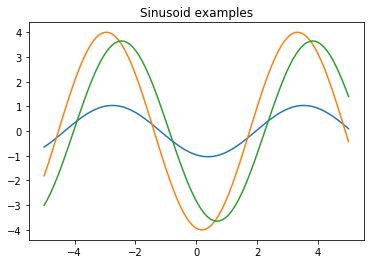

In [2]:
for _ in range(3):
    plt.title('Sinusoid examples')
    plot_sines(SinusoidFunction(K=100).equally_spaced_samples())
plt.show()

### Generate sinusoid datasets
For meta-training we create a dataset of 10000 meta-datasets with $K = 10$ samples each. In the original paper the train the system on 50.0000 meta-datasets.

In [4]:
train_ds, test_ds = generate_dataset(K=10, train_size=10000)

### Neural Network Model
As a learner we use two layer neural network with 40 neurons in each layer:

In [5]:
class RegressionModel(keras.Model):
    """
    Creates a feed forwar neural network for regression. Architecture is as described in the original
    MAML paper.
    """
    def __init__(self):
        super().__init__()
        self.hidden1 = keras.layers.Dense(40, input_shape=(1,), dtype="float32")
        self.hidden2 = keras.layers.Dense(40, dtype="float32")
        self.out = keras.layers.Dense(1, dtype="float32")

    def forward(self, x):
        x = keras.activations.relu(self.hidden1(x))
        x = keras.activations.relu(self.hidden2(x))
        x = self.out(x)
        return x
    
model = RegressionModel()

W1029 11:02:23.456417 139805235230464 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Train Model using the MAML Algorithm
The implementation is quite long, so we put it into a seperate file. Here's just the call, where we need an initilized model a training dataset:

In [ ]:
train(model, 1, train_ds)

### Evaluation 
Finally we'll have a look on how the system adapts to new data by fitting the learning to new sine functions given only 1, 5, or 10 gradient update steps.

In [ ]:
eval_sinewave_for_test(model=model)

# Hackathon Projects
## Meta-Classification
Get the omniglot dataset and train a meta-learning agent for few-shot mea-classification

## Meta-Reinforcement Learning
Use the provided environment to train a meta-reinforcement learning agent.